# Exercise

In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
colnames=['date', 'time_stamp', 'destination', 'user_id', 'cohort', 'ip_address']
df_orig = pd.read_csv('curriculum-access.txt',          
                 engine='python',
                 header=None,
                 index_col=False,
                 names=colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',     
                 na_values='"-"')

In [3]:
df_orig.head()

,date,time_stamp,destination,user_id,cohort,ip_address
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62


In [4]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543596 entries, 0 to 543595
Data columns (total 6 columns):
date           543596 non-null object
time_stamp     543596 non-null object
destination    543595 non-null object
user_id        543596 non-null int64
cohort         515740 non-null float64
ip_address     543596 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 24.9+ MB


In [5]:
df_orig.destination.value_counts()

/                           28920
javascript-i                10950
search/search_index.json    10859
toc                          9839
html-css                     8202
                            ...  
mysql//sample-database          1
java-iii/jdbc/poop              1
interview-questions             1
html                            1
6-stats                         1
Name: destination, Length: 1811, dtype: int64

In [6]:
df_orig.cohort / 543596

0         0.000015
1         0.000015
2         0.000015
3         0.000015
4         0.000040
            ...   
543591    0.000103
543592    0.000101
543593    0.000105
543594    0.000052
543595    0.000105
Name: cohort, Length: 543596, dtype: float64

In [7]:
df_orig.max()

date          2020-05-15
time_stamp      23:59:59
user_id              650
cohort                57
ip_address    99.7.96.28
dtype: object

In [8]:
df_orig.min()

date               2018-01-26
time_stamp           00:00:00
user_id                     1
cohort                      1
ip_address    100.101.171.239
dtype: object

In [9]:
df_orig.nunique()

date             841
time_stamp     66826
destination     1811
user_id          650
cohort            36
ip_address      3495
dtype: int64

In [10]:
df_orig.date.min()

'2018-01-26'

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 50_000)

In [12]:
df_orig

,date,time_stamp,destination,user_id,cohort,ip_address
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
...,...,...,...,...,...,...
543591,2020-05-15,15:01:40,java-ii/file-io,602,56.0,48.188.241.68
543592,2020-05-15,15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38
543593,2020-05-15,15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17
543594,2020-05-15,15:05:14,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227


In [13]:
df_orig[df_orig.user_id == 429]['date']

282106    2019-06-12
282107    2019-06-12
282108    2019-06-12
282109    2019-06-12
283444    2019-06-14
283445    2019-06-14
283446    2019-06-14
283487    2019-06-14
283488    2019-06-14
283517    2019-06-14
283521    2019-06-14
283525    2019-06-14
283539    2019-06-14
284956    2019-06-18
285057    2019-06-18
285681    2019-06-19
285682    2019-06-19
285683    2019-06-19
285684    2019-06-19
285686    2019-06-19
285726    2019-06-19
285729    2019-06-19
285730    2019-06-19
286194    2019-06-20
286195    2019-06-20
286196    2019-06-20
287160    2019-06-21
287161    2019-06-21
287169    2019-06-21
287170    2019-06-21
287173    2019-06-21
287176    2019-06-21
287181    2019-06-21
287183    2019-06-21
287184    2019-06-21
287186    2019-06-21
287189    2019-06-21
287191    2019-06-21
287329    2019-06-21
287369    2019-06-21
287377    2019-06-21
287393    2019-06-21
287395    2019-06-21
287439    2019-06-21
287440    2019-06-21
287517    2019-06-22
287518    2019-06-22
287654    201

In [14]:
(df_orig.user_id == 600).sum()

807

In [15]:
df_orig[df_orig.destination == '10-anomaly-detection/1-overview']['cohort'].value_counts()

34.0    371
28.0    348
55.0     88
22.0      2
51.0      1
14.0      1
32.0      1
Name: cohort, dtype: int64

In [16]:
 df_orig[df_orig.destination == 'A-clustering/project']['ip_address'].value_counts()

175.247.198.180    1
Name: ip_address, dtype: int64

In [17]:
df_orig[df_orig.destination == 'content/mysql/intro-to-mysql/index.html']['ip_address'].value_counts()

97.94.95.226    1
Name: ip_address, dtype: int64

In [18]:
#97.94.95.226

In [19]:
#175.247.198.180

In [20]:
(df_orig.cohort == 55.0).sum()

14252

In [21]:
df_orig.isna().sum() / 543596

date           0.000000
time_stamp     0.000000
destination    0.000002
user_id        0.000000
cohort         0.051244
ip_address     0.000000
dtype: float64

In [22]:
df2 = df_orig.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d8d5410>,
      dtype=object)

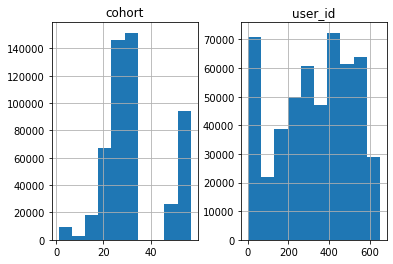

In [23]:
df2.hist()

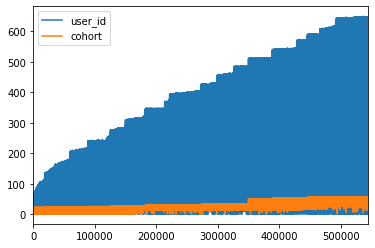

In [24]:
df2.plot()

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515739 entries, 0 to 543595
Data columns (total 6 columns):
date           515739 non-null object
time_stamp     515739 non-null object
destination    515739 non-null object
user_id        515739 non-null int64
cohort         515739 non-null float64
ip_address     515739 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ MB


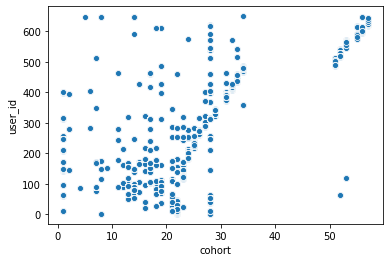

In [26]:
x = 'cohort'
y = 'user_id'
sns.scatterplot(x, y, data=df2)

In [27]:
df2.destination.value_counts()

/                                                                                                                                                                                                                                                                          25959
javascript-i                                                                                                                                                                                                                                                               10795
toc                                                                                                                                                                                                                                                                         9796
search/search_index.json                                                                                                                                                             

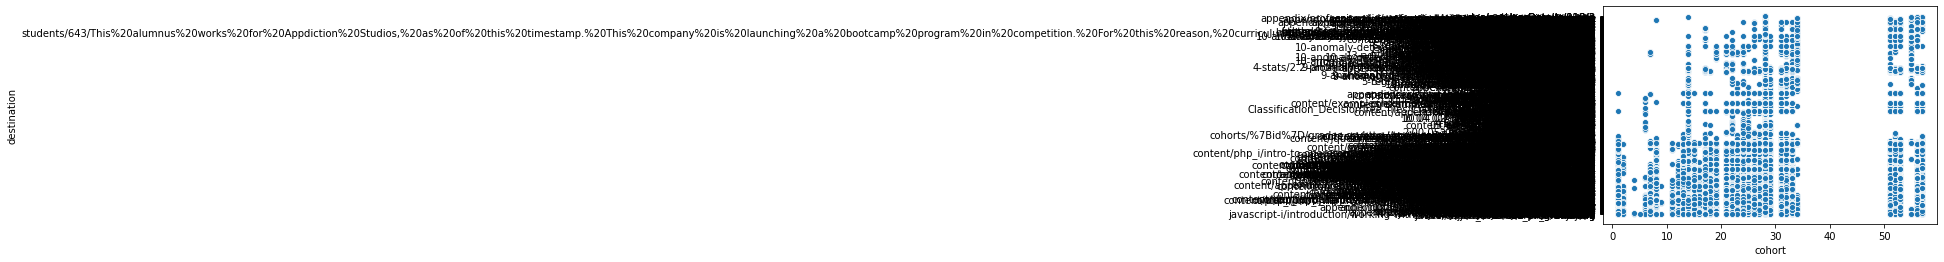

In [28]:
x = 'cohort'
y = 'destination'
sns.scatterplot(x, y, data=df2)

In [29]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543596 entries, 0 to 543595
Data columns (total 6 columns):
date           543596 non-null object
time_stamp     543596 non-null object
destination    543595 non-null object
user_id        543596 non-null int64
cohort         515740 non-null float64
ip_address     543596 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 24.9+ MB


In [30]:
df_orig.destination.value_counts()

/                                                                                                                                                                                                                                                                          28920
javascript-i                                                                                                                                                                                                                                                               10950
search/search_index.json                                                                                                                                                                                                                                                   10859
toc                                                                                                                                                                                  

Can you label students who are viewing both the web dev and data science curriculum?

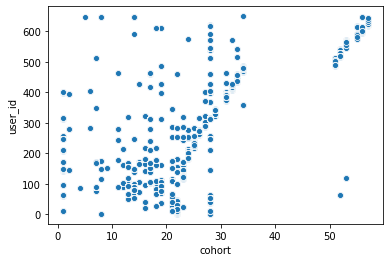

In [31]:
sns.scatterplot(x='cohort', y='user_id', data=df_orig)

In [32]:
df_orig.cohort.value_counts()

33.0    38851
28.0    37409
29.0    36613
24.0    35336
53.0    29992
22.0    28997
23.0    28193
32.0    27920
26.0    27586
51.0    26389
52.0    26212
25.0    25364
31.0    24322
34.0    23845
27.0    20264
56.0    14438
55.0    14252
57.0     9547
14.0     9374
1.0      8882
21.0     7411
17.0     4821
13.0     2626
8.0      1712
18.0     1641
19.0     1165
16.0      743
15.0      691
7.0       495
12.0      270
11.0      204
2.0        93
6.0        72
9.0         5
4.0         4
5.0         1
Name: cohort, dtype: int64

543595

In [38]:
#webdev = ['java', 'javascript', 'css', 'jquery']
#df_orig['webdev'] = df_orig 

def get_topic(destination):
    ds_list = ["python", "time series", "nlp"]
    web_dev = ["javascript", "java", "css"]
    for ds in ds_list:
        if ds in destination:
            return "Data_Science"
    for wd in web_dev:
        if wd in destination:
            return "Web_Dev"
    return "Unknown"


df_orig["course"] = df_orig.destination.apply(get_topic)

TypeError: argument of type 'float' is not iterable

In [33]:
df_orig.head()

,date,time_stamp,destination,user_id,cohort,ip_address
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62


In [48]:
df_orig['before_lunch'] = df_orig.time_stamp <= '12:30:59'
df_orig['after_lunch'] = df_orig.time_stamp > '13:29:59'

In [50]:
df_orig.head()

,date,time_stamp,destination,user_id,cohort,ip_address,before_lunch,after_lunch
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62,True,False
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62,True,False
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62,True,False
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62,True,False
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62,True,False


In [55]:
x = df_orig.user_id
y = df_orig.cohort

sns.boxplot(x, y, data=df_orig)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11ab119e0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
x = df_orig.user_id
y = df_orig.cohort

sns.scatterplot(x, y, data=df_orig, hue='before_lunch')